In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import statistics

In [3]:
# Import your data into a Pandas DataFrame.
city_data_load= os.path.join("Resources", "city_data.csv")
ride_data_load= os.path.join("Resources", "ride_data.csv")

# read files
city_data_df = pd.read_csv(city_data_load)
ride_data_df = pd.read_csv(ride_data_load)

In [4]:
# Inspect DataFrames before merging them
city_data_df.count()

# Get the columns and the rows that are not null.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [5]:
# checking to see what the data types are for each column
# specifically we want to know if the driver_count column is an int type column as we will be doing calculations
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [6]:
# Get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [7]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Rural")

18

In [8]:
# Merge your DataFrames.
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [9]:
# create the Urban city DF
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]

# create Suburban city DF
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]

# create Rural city DF
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

In [10]:
# get the number of rides for all the city types
# column that we want to index goes into the groupby([]) function
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]

suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]

rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [78]:
# get average fare for each city based on city type
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]

suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]

rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

city
Amandaburgh            24.641667
Barajasview            25.332273
Carriemouth            28.314444
Christopherfurt        24.501852
Deanville              25.842632
                         ...    
West Patrickchester    28.233125
West Robert            25.123871
West Samuelburgh       21.767600
Williamsstad           24.362174
Williamsview           26.599000
Name: fare, Length: 66, dtype: float64 city
Barronchester         36.422500
Bethanyland           32.956111
Brandonfort           35.437368
Colemanland           30.894545
Davidfurt             31.995882
East Aaronbury        25.661111
East Danielview       31.560588
East Kentstad         29.823077
East Marymouth        30.835185
Grayville             27.763333
Josephside            32.858148
Lake Ann              30.890000
Lake Omar             28.075000
Lake Robertside       31.262000
Lake Scott            31.886111
Lewishaven            25.241667
Lewisland             34.614118
Mezachester           30.760000
Myersshire  

In [12]:
# get average number of drivers for each urban city
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]

suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]

rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

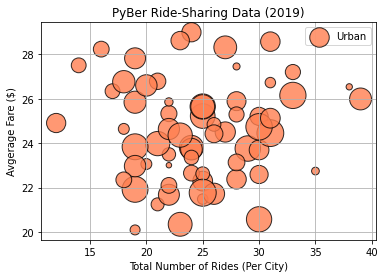

In [19]:
# define axis data and create scatter plot for urban cities
plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s=10*urban_driver_count, 
            color="coral",
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Avgerage Fare ($)")
plt.xlabel ("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

plt.show()

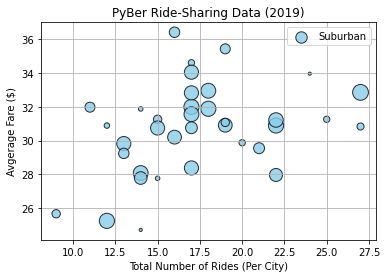

In [20]:
# define axis data and create scatter plot for urban cities
plt.scatter(suburban_ride_count, 
            suburban_avg_fare, 
            s=10*suburban_driver_count, 
            color="skyblue",
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Avgerage Fare ($)")
plt.xlabel ("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

plt.show()

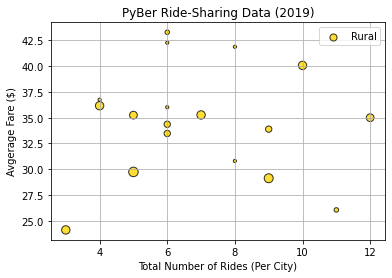

In [22]:
# define axis data and create scatter plot for urban cities
plt.scatter(rural_ride_count, 
            rural_avg_fare, 
            s=10*rural_driver_count, 
            color="gold",
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Avgerage Fare ($)")
plt.xlabel ("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


IndexError: list index out of range

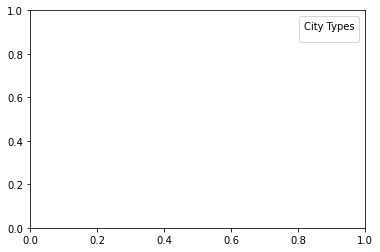

In [29]:
# set variable for the legend function
# legend on the scatter plot is not scaled
lgnd = plt.legend(fontsize="12",
                 mode="Expanded",
                 scatterpoints=1, 
                 loc="best",
                 title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

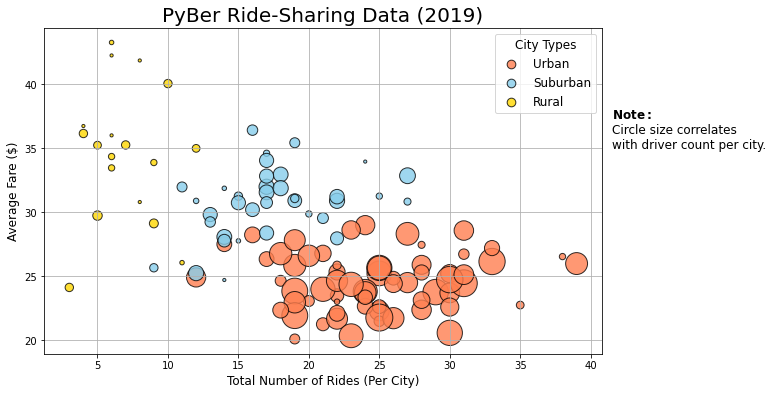

<Figure size 432x288 with 0 Axes>

In [60]:
# Build the scatter charts for each city type
# figsize enlarges the markers; doing so will spread them out more
plt.subplots(figsize=(10, 6))

plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s=10*urban_driver_count, 
            color="coral",
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count, 
            suburban_avg_fare, 
            s=10*suburban_driver_count, 
            color="skyblue",
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count, 
            rural_avg_fare, 
            s=10*rural_driver_count, 
            color="gold",
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Rural")

# formating/titles
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)
plt.text(41.5, 35, r"$\bf{" + "Note:" + "}$\n" + "Circle size correlates\n" + "with driver count per city.", fontsize="12")

# displays legend
lgnd = plt.legend(fontsize="12",
                 mode="Expanded",
                 scatterpoints=1, 
                 loc="best",
                 title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# displays plot
plt.show()

# Save the figure.
plt.savefig("analysis/Fig1.png")

In [61]:
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [66]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [65]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [67]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [68]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [70]:
# Calculate the mean of the ride count for each city type.
urban_ride_count.mode(), suburban_ride_count.mode(), rural_ride_count.mode()

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

In [71]:
# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts

In [75]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [80]:
# Get the fares for the urban cities.
urban_fares = urban_cities_df["fare"]

# Get the fares for the urban cities.
suburban_fares = suburban_cities_df["fare"]

# Get the fares for the urban cities.
rural_fares = rural_cities_df["fare"]

In [81]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [82]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for urban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for urban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for urban trips is {mode_suburban_fares}.")

The mean fare price for urban trips is $30.97.
The median fare price for urban trips is $30.75.
The mode fare price for urban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [84]:
# Get the driver count data from the urban cities.
urban_drivers = urban_cities_df['driver_count']


# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean for the ride counts for urban trips is {mean_urban_drivers:.2f}.")

median_urban_drivers = np.median(urban_drivers)
print(f"The median for the ride counts for urban trips is {median_urban_drivers}.")

mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode for the ride counts for urban trips is {mode_urban_drivers}.")

The mean for the ride counts for urban trips is 36.68.
The median for the ride counts for urban trips is 37.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([39], dtype=int64), count=array([86])).


In [85]:
# Get the driver count data from the urban cities.
suburban_drivers = suburban_cities_df['driver_count']


# Calculate the measures of central tendency for the ride count for the urban cities.
mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean for the ride counts for urban trips is {mean_suburban_drivers:.2f}.")

median_suburban_drivers = np.median(suburban_drivers)
print(f"The median for the ride counts for urban trips is {median_suburban_drivers}.")

mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode for the ride counts for urban trips is {mode_suburban_drivers}.")

The mean for the ride counts for urban trips is 13.71.
The median for the ride counts for urban trips is 16.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([20], dtype=int64), count=array([79])).


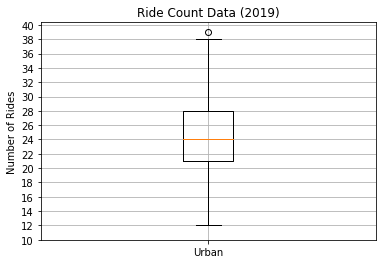

In [86]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

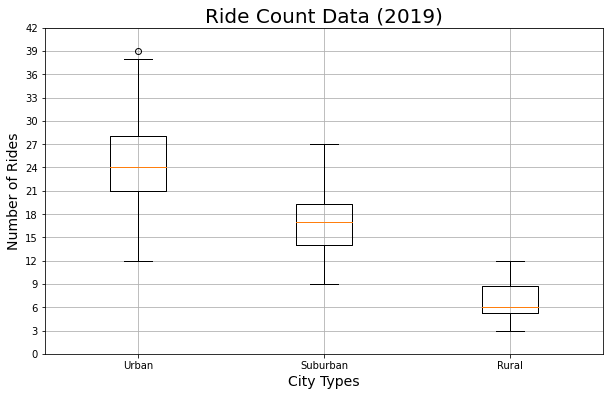

In [87]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

In [88]:
# Get the city that matches 39.
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


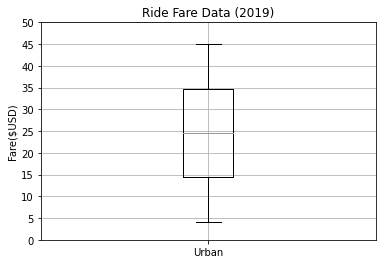

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [89]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

In [14]:
# Create a bubble chart that showcases the average fare versus the total number of rides with 
# bubble size based on the total number of drivers for each city type, including urban, suburban, and rural.

In [15]:
# Determine the mean, median, and mode for the following:
# The total number of rides for each city type.
# The average fares for each city type.
# The total number of drivers for each city type.

In [16]:
# Create box-and-whisker plots that visualize each of the following to determine if there are any outliers:
# The number of rides for each city type.
# The fares for each city type.
# The number of drivers for each city type.

In [17]:
# Create a pie chart that visualizes each of the following data for each city type:
# The percent of total fares.
# The percent of total rides.
# The percent of total drivers.